#### Assignment 1  - Han Yuxuan (E0509777)
This answer sheet contains your answer to questions in Section 1~4. Sentences in <span style="color:blue">blue</span> indicates questions to be answered. 

For open questions, please organize your answer into "points" to ease our grading efforts. For example, an answer to "What is the most popular item? Explain you answer and describe any assumptions you’ve made." should look like:

> The most popular item ID is 12345. The reason is that:
> - reason 1
> - reason 2
> 
> I've made the following assumptions:
> - assumption 1
> - assumption 2

If you wish to type math equations in markdown, follow this link: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

Remember to save this Jupyter notebook as __YourNameInLumiNUS_YourNUSNETID.ipynb__.

**Import all libraries and load data here**

In [49]:
import numpy as np
import random

### Section 1 - Clustering and Initialization (20 points)

<span style="color:blue"> Consider the nine data points (A, B, C, D, E, F, G, H, I) in Fig. 1. Taking the points D, E, and F as the initial cluster centers, apply the K-Means algorithm on the data, with the number of clusters K = 3. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. Do you think this clustering result is satisfactory? </span>

In [50]:
def distance(a,b):
    return np.linalg.norm(a-b)

def my_k_means(K, points, centers):

    it = 1
    while(it):    
        print('\nIteration',it,'\n')

        clusters = {}
        for i in range(K):
            clusters[i] = []

        for i in range(len(points)):
            dis = float('inf')
            ctr = 0
            for j in range(K):
                cur_dis = distance(points[i], centers[j])
                if cur_dis < dis:
                    dis = cur_dis
                    ctr = j
            clusters[ctr].append(points[i])

        for j in range(K):
            print("center",j,":",centers[j])
            print("points:",clusters[j],"\n")

        new_centers = np.zeros((K,2))
        for j in range(K):
            new_centers[j] = sum(clusters[j])/K

        if (centers == new_centers).all():
            break

        centers = new_centers
        it += 1

In [51]:
K = 3

points = np.array([[-5, 1], [-5, 0], [-5, -1],
              [0, 1], [0, 0], [0, -1],
              [5, 1], [5, 0], [5, -1]])

centers = points[random.sample(range(0, len(points)), 3)]

my_k_means(K, points, centers)


Iteration 1 

center 0 : [-5  0]
points: [array([-5,  1]), array([-5,  0]), array([-5, -1])] 

center 1 : [0 0]
points: [array([0, 0]), array([ 0, -1]), array([5, 0]), array([ 5, -1])] 

center 2 : [0 1]
points: [array([0, 1]), array([5, 1])] 


Iteration 2 

center 0 : [-5.  0.]
points: [array([-5,  1]), array([-5,  0]), array([-5, -1])] 

center 1 : [ 3.33333333 -0.66666667]
points: [array([5, 1]), array([5, 0]), array([ 5, -1])] 

center 2 : [1.66666667 0.66666667]
points: [array([0, 1]), array([0, 0]), array([ 0, -1])] 


Iteration 3 

center 0 : [-5.  0.]
points: [array([-5,  1]), array([-5,  0]), array([-5, -1])] 

center 1 : [5. 0.]
points: [array([5, 1]), array([5, 0]), array([ 5, -1])] 

center 2 : [0. 0.]
points: [array([0, 1]), array([0, 0]), array([ 0, -1])] 



<b>The classification result is not bad.</b>

<span style="color:blue"> Initialization is important for K-means. Consider the following heuristic method for selecting the initial cluster center positions: <br><br>
Choose the first center $c_1$ as the point A.<br>
For $k=2,...,K$, set $c_k = \underset{x\in X}{\arg\max}(\underset{i=1,...,k-1}{\min}\Vert x - c_i \Vert_2)$, where X is the set of data points.<br><br>
Apply this heuristic to the data points in Fig. 1. Show the computed cluster centers for K = 3. Next, run the K-means algorithm with the obtained cluster centers. At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster.
</span>

In [52]:
K = 3

points = np.array([[-5, 1], [-5, 0], [-5, -1],
              [0, 1], [0, 0], [0, -1],
              [5, 1], [5, 0], [5, -1]])

def initialize_centers(K, points):
    center_indices = [random.randint(0, K-1)]
    for i in range(K-1):
        max_dis = 0
        max_j = 0
        for j in range(len(points)):
            min_dis = float('inf')
            for k in center_indices:
                min_dis = min(min_dis, distance(points[j], points[k]))
            if min_dis > max_dis:
                max_dis = min_dis
                max_j = j
        center_indices.append(max_j)
    return points[center_indices]

my_k_means(K, points, initialize_centers(K, points))


Iteration 1 

center 0 : [-5 -1]
points: [array([-5,  1]), array([-5,  0]), array([-5, -1])] 

center 1 : [5 1]
points: [array([5, 1]), array([5, 0]), array([ 5, -1])] 

center 2 : [0 0]
points: [array([0, 1]), array([0, 0]), array([ 0, -1])] 


Iteration 2 

center 0 : [-5.  0.]
points: [array([-5,  1]), array([-5,  0]), array([-5, -1])] 

center 1 : [5. 0.]
points: [array([5, 1]), array([5, 0]), array([ 5, -1])] 

center 2 : [0. 0.]
points: [array([0, 1]), array([0, 0]), array([ 0, -1])] 



### Section 2 - Selecting the Number of Clusters (10 points)

<span style="color:blue"> Here, we will explore how to select the number of clusters. Using Python 3.6, load the attached data file 'assignment1.data' using the following commands:</span>
    
<span style="color:blue">import joblib<br>X = joblib.load('assignment1.data')</span>

<span style="color:blue">This results in X, which is a 400 by 2 matrix, where each row is a single sample, in 2 dimensions. Apply K-means on these samples with K ranging from 1 to 10. Plot a figure, where the y-axis is the Within Cluster Sum of Squares (WCSS) after convergence, and the x-axis is K from 1 to 10: </span>

<span style="color:blue">$WCSS = \sum_{k=1}^K \sum_{x \in C_i} \Vert x - c_i \Vert_2^2$</span>

<span style="color:blue">Select a value of K that you think is appropriate for clustering this dataset, and explain the reason. </span>

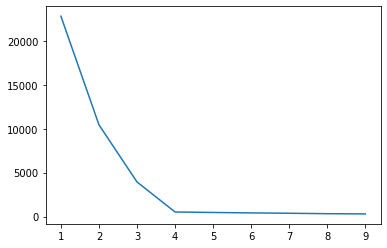

In [53]:
import joblib
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = joblib.load('assignment1.data')
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.show()

<b> 4 is an appropriate value for k, as the drop rate doesn't change much after 4.</b>

### Section 3 - Data Cleaning and Exploration (20 points)

<span style="color:blue"> 1) Before continuing, let us examine the dataset for “dirty” records to do some data cleaning. Remove the records with negative values of the Quantity variable, and the records with NaN values of the CustomerID variable. Report how many records were removed in total. </span>

<b>143985 records are removed</b>

In [54]:
import pandas as pd
import math

original_data = pd.read_csv('record.csv')
data = original_data[original_data['Quantity']>0]
data = data[data['CustomerID'].apply(lambda x: not math.isnan(x))]

len(original_data) - len(data)

143985

<span style="color:blue"> 2)~9) Please provide the answers to the questions listed in the table. </span>

In [55]:
data.sort_values(by='InvoiceDate').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0


In [56]:
data.sort_values(by='InvoiceDate').tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0


In [57]:
len(data['CustomerID'].unique())

4339

In [58]:
len(data['InvoiceNo'].unique())

18536

In [59]:
len(data['StockCode'].unique())

3665

In [60]:
cus_data = data[data['CustomerID']==17850]
len(cus_data['InvoiceNo'].unique())

34

In [61]:
max_tras = 0
cus_id = 0
for customer in data['CustomerID'].unique():
    num_tras = len(data[data['CustomerID']==customer]['InvoiceNo'].unique())
    if num_tras > max_tras:
        max_tras = num_tras
        cus_id = customer
cus_id

12748.0

In [62]:
data.groupby('StockCode').sum().sort_values('Quantity').tail()

,Quantity,UnitPrice,CustomerID
StockCode,,,
85099B,46181,3261.69,24748363.0
22197,49183,896.36,16490386.0
84077,54415,138.40,7226036.0
23166,77916,241.62,3047321.0
23843,80995,2.08,16446.0


This is a markdown cell. Please fill in your answer for (2)~(9).

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 2)  | Starting date of the dataset?                                                                              | 2010-12-01 08:26:00|
| 3)  | Ending date of the dataset?                                                                                | 2011-12-09 12:50:00|
| 4)  | Number of customers?                                                                                       | 4339|
| 5)  | Number of transactions?                                                                                    | 18536|
| 6)  | Number of different kind of items?                                                                         | 3665|
| 7)  | Number of transactions customer ID 17850 has made?                                                         | 34|
| 8)  | Which customer (ID) has made the most transactions?                                                        | 12748.0|
| 9)  | What is the item ID (i.e. StockCode) of the best-seller? We define "best-seller" as the item with the highest sales volume. | 23843|

<span style="color:blue"> 10) Next, let us get some general understanding about the transactions. Please make a histogram of the number of unique items per transaction (as described below) and describe one insight that you can observe from the plot.  
(Note: You can plot this histogram by running matplotlib.hist() with 200 bins on the sequence of values $n_1, …, n_N$, where $n_i$ is the number of unique items in transaction $i$. This produces a histogram with “number of unique items in transaction” in the x-axis, and “count” in the y-axis, i.e. each bar counts how many transactions fall into the corresponding bucket. It is sufficient to comment on the general shape of the curve and what it implies about the data; it’s fine if the insight does not seem especially interesting.)
</span>

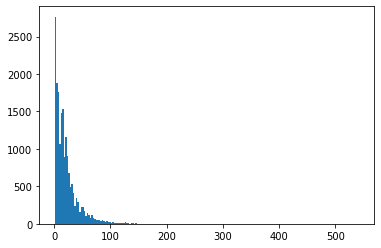

In [63]:
plt.hist(x=list(data.groupby(['InvoiceNo']).size()),bins=200)
plt.show()

<b>With more distinct items in the transaction, the number of transactions decreases quatratically. This implies that most transactions only cover a small amount of different items</b>

#### Section 4 - Mining Association Rules

<span style="color:blue"> 1) Will we complete the counting before the sun burns out (the sun has another $ 5 \times 10^9 < 2^{33} $ years to burn)? </span>

In [64]:
len(data['StockCode'].unique())

3665

<b>Impossible. pow(3, 3665) >> pow(2, 36) * pow(2, 33) * (365 * 24 * 3600)</b>

<span style="color:blue"> 2) Run efficient-apriori in python with min_support=0.025, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [65]:
from efficient_apriori import apriori
import time
transactions = list(data.groupby('InvoiceNo')['StockCode'].apply(tuple))

In [66]:
start_time = time.time()
itemsets, rules = apriori(transactions, min_support=0.025, min_confidence=0.2, max_length=4)
time.time()-start_time

15.18248987197876

In [67]:
len(rules)

22

In [68]:
sorted_rules = sorted(rules, key=lambda rule: rule.lift)
print(sorted_rules[-1])

{22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)


<b>22 rulse found. {22697} -> {22699} has the highest fit</b>

<span style="color:blue"> 3) Run efficient-apriori in python with min_support=0.02, min_confidence=0.2, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [69]:
start_time = time.time()
itemsets, rules = apriori(transactions, min_support=0.02, min_confidence=0.2, max_length=4)
time.time()-start_time

36.079835176467896

In [70]:
len(rules)

88

In [71]:
sorted_rules = sorted(rules, key=lambda rule: rule.lift)
print(sorted_rules[-1])

{22698} -> {22697, 22699} (conf: 0.701, supp: 0.021, lift: 24.033, conv: 3.252)


<b>88 rules found. {22698} -> {22697, 22699} has the highest lift.</b>

<span style="color:blue"> 4) Run efficient-apriori in python with min_support=0.025, min_confidence=0.4, max_length=4. Write down the number of rules found and the rule with the highest lift. </span>

In [72]:
start_time = time.time()
itemsets, rules = apriori(transactions, min_support=0.025, min_confidence=0.4, max_length=4)
time.time()-start_time

18.319862127304077

In [73]:
len(rules)

19

In [74]:
sorted_rules = sorted(rules, key=lambda rule: rule.lift)
print(sorted_rules[-1])

{22697} -> {22699} (conf: 0.783, supp: 0.029, lift: 18.534, conv: 4.412)


<b>19 rules found. {22698} -> {22699} has the highest lift.</b>

<span style="color:blue"> 5) Compare the first two cases. How do they differ in the time taken for the algorithm to run, the number of rules found, and the lift of the highest lift rule? Briefly explain why each of these findings occur, based on the effects of changing min_support.  </span>

<b> The second takes longer and find more rules than the first. With smaller min_support, fewer frequent itemsets will be filtered out at each iteration, which causes more time on both itemset generation and rule generation. 
    <br><br>The lift of the highest lift rule in the second case is also higher than the first, as more rules are found.</b>

<span style="color:blue"> 6) Compare the first and third case. How do they differ in the number of rules found? Briefly explain why this finding occurs, based on the effects of changing min_confidence. </span>

<b> The third takes almost the same time and find fewer rules than the first. With higher min_confidence, the frequent itemsets generation is the same, but more rules will be filtered out in the rule generation stage. The highest lifts are the same.</b>

<span style="color:blue"> 7) Report the descriptions of the items associated with the highest lift rule you found in the three queries (you may use any method to do this). Does the rule make sense? </span>

In [75]:
print(data[data['StockCode']=='22698']['Description'].unique())
print(data[data['StockCode']=='22697']['Description'].unique())
print(data[data['StockCode']=='22699']['Description'].unique())

['PINK REGENCY TEACUP AND SAUCER']
['GREEN REGENCY TEACUP AND SAUCER']
['ROSES REGENCY TEACUP AND SAUCER ']


<b> Customers who buy pink regency teacups and saucers are also likely to buy green and rose ones. It somewhat makes sense as people may want to buy teacups of different colors together. </b>